In [1]:
from docx import Document
import pandas as pd

In [2]:
# load he document from local file directory
doc = Document("mmc1.docx")

In [34]:
#Taking data from Supplementary table 2 for lineage by month data
table_index = 1 #1 since index values start from 0

In [35]:
print(doc)

In [36]:
#getting the table
table = doc.tables[table_index]

In [37]:
#Extracting the data from the table
data = []
for row in table.rows:
    row_data = [cell.text.strip() for cell in row.cells]
    data.append(row_data)

In [38]:
#convert table into a dataframe
df = pd.DataFrame(data[1:], columns=data[0]) #keeping the first row as the header in the df

In [39]:
print(df)
#print to check the data has been loaded succesfully into the dataframe

            Month AY.23, \nn (%) B.1.617.2, \nn (%) AY.59, \nn (%)  \
0       June 2021       6 (7.59)         41 (51.90)       4 (5.06)   
1       July 2021      28 (6.44)        326 (74.94)      37 (8.51)   
2     August 2021    513 (36.18)        543 (38.29)     102 (7.19)   
3  September 2021    817 (50.94)        580 (36.16)      20 (1.25)   
4    October 2021    463 (46.16)        226 (22.53)    158 (15.75)   
5   November 2021    303 (35.99)          71 (8.43)    215 (25.53)   
6   December 2021    153 (23.76)          22 (3.42)    175 (27.17)   
7    January 2021       6 (4.35)           3 (2.17)       4 (2.90)   

  AY.79, \nn (%) AY.4\nn (%) AY.24\nn (%) AY.76, \nn (%) BA.1.1, \nn (%)  \
0       5 (6.33)    2 (2.53)     0 (0.00)       0 (0.00)        0 (0.00)   
1       8 (1.84)    5 (1.15)     4 (0.92)       1 (0.23)        0 (0.00)   
2      51 (3.60)   79 (5.57)    31 (2.19)       6 (0.42)        0 (0.00)   
3      43 (2.68)   37 (2.31)    40 (2.49)       7 (0.44)        0

In [40]:
#save the data in a csv file
df.to_csv("Lineage_by_month.csv", index=False)
print("Saved data as 'Lineage_by_month.csv' file")

Saved data as 'Lineage_by_month.csv' file


In [41]:
#load the csv file as df
df = pd.read_csv("Lineage_by_month.csv")

In [42]:
print(df.columns)
#identify the column names in the dataset

Index(['Month', 'AY.23, \nn (%)', 'B.1.617.2, \nn (%)', 'AY.59, \nn (%)',
       'AY.79, \nn (%)', 'AY.4\nn (%)', 'AY.24\nn (%)', 'AY.76, \nn (%)',
       'BA.1.1, \nn (%)', 'AU.2, \nn (%)', 'BA.1 \nn (%)', 'Others,\nn (%)',
       'Total,\nn (%)'],
      dtype='object')


In [43]:
print(df.iloc[0, 1])  # print the first cell in the first lineage column


6 (7.59)


In [44]:
#extract and only use the percentage data from the column/lineages
import re

#extrating the percentage value, values in the parentheses from the lineages
def extract_percentage(value):
    value = str(value)
    match = re.search(r'\(([\d]+(?:\.\d+)?)\)', value)
    return float(match.group(1)) if match else None


In [45]:
#applying function to all lineage columns

# Assuming column 0 is 'Month'
for col in df.columns[1:]:
    df[col] = df[col].apply(extract_percentage)

In [46]:
#print the lineage column to verify the extraction
print(df.head())

            Month  AY.23, \nn (%)  B.1.617.2, \nn (%)  AY.59, \nn (%)  \
0       June 2021            7.59               51.90            5.06   
1       July 2021            6.44               74.94            8.51   
2     August 2021           36.18               38.29            7.19   
3  September 2021           50.94               36.16            1.25   
4    October 2021           46.16               22.53           15.75   

   AY.79, \nn (%)  AY.4\nn (%)  AY.24\nn (%)  AY.76, \nn (%)  BA.1.1, \nn (%)  \
0            6.33         2.53          0.00            0.00              0.0   
1            1.84         1.15          0.92            0.23              0.0   
2            3.60         5.57          2.19            0.42              0.0   
3            2.68         2.31          2.49            0.44              0.0   
4            7.18         0.70          0.50            3.09              0.0   

   AU.2, \nn (%)  BA.1 \nn (%)  Others,\nn (%)  Total,\nn (%)  
0         

In [47]:
#list the column names to only use the covid-19 lineage olumns and not other columns such as Total and Others
print(df.columns.tolist())

['Month', 'AY.23, \nn (%)', 'B.1.617.2, \nn (%)', 'AY.59, \nn (%)', 'AY.79, \nn (%)', 'AY.4\nn (%)', 'AY.24\nn (%)', 'AY.76, \nn (%)', 'BA.1.1, \nn (%)', 'AU.2, \nn (%)', 'BA.1 \nn (%)', 'Others,\nn (%)', 'Total,\nn (%)']


In [48]:
#clean the column name
df.columns = [col.replace('\n', '').replace('n (%)', '').strip().split(',')[0] for col in df.columns]
print(df.columns.tolist())

['Month', 'AY.23', 'B.1.617.2', 'AY.59', 'AY.79', 'AY.4', 'AY.24', 'AY.76', 'BA.1.1', 'AU.2', 'BA.1', 'Others', 'Total']


In [49]:
#create a new variable for the COVID-19 lineages only
lineage_columns = ['AY.23', 'B.1.617.2', 'AY.59', 'AY.79', 'AY.4', 'AY.24', 'AY.76', 'BA.1.1', 'AU.2', 'BA.1']

In [50]:
#create a new column to identify the most prevalent/domninat lineage in each month
df['Most_Prevalent_Lineage'] = df[lineage_columns].idxmax(axis=1)
print(df[['Month', 'Most_Prevalent_Lineage']])

            Month Most_Prevalent_Lineage
0       June 2021              B.1.617.2
1       July 2021              B.1.617.2
2     August 2021              B.1.617.2
3  September 2021                  AY.23
4    October 2021                  AY.23
5   November 2021                  AY.23
6   December 2021                  AY.79
7    January 2021                 BA.1.1


In [51]:
#spliting the feeatures and the target for machine learning
# X as Features; Y as Target Labels

X = df[lineage_columns]
Y = df['Most_Prevalent_Lineage']


In [52]:
print(X.head())
print(Y.head())


   AY.23  B.1.617.2  AY.59  AY.79  AY.4  AY.24  AY.76  BA.1.1  AU.2  BA.1
0   7.59      51.90   5.06   6.33  2.53   0.00   0.00     0.0  8.86   0.0
1   6.44      74.94   8.51   1.84  1.15   0.92   0.23     0.0  1.84   0.0
2  36.18      38.29   7.19   3.60  5.57   2.19   0.42     0.0  3.03   0.0
3  50.94      36.16   1.25   2.68  2.31   2.49   0.44     0.0  0.12   0.0
4  46.16      22.53  15.75   7.18  0.70   0.50   3.09     0.0  0.00   0.0
0    B.1.617.2
1    B.1.617.2
2    B.1.617.2
3        AY.23
4        AY.23
Name: Most_Prevalent_Lineage, dtype: object


In [53]:
#Machine Learning Time

#using a Random Forest Classifier model since the dataset is small.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
#split dataset for training and testing

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.25, random_state=42
)


In [55]:
#training the random forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [56]:
#evaluating the model
Y_pred = model.predict(X_test)

print("The Classification Report:")
print(classification_report(Y_test, Y_pred))

The Classification Report:
              precision    recall  f1-score   support

       AY.23       1.00      1.00      1.00         1
   B.1.617.2       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



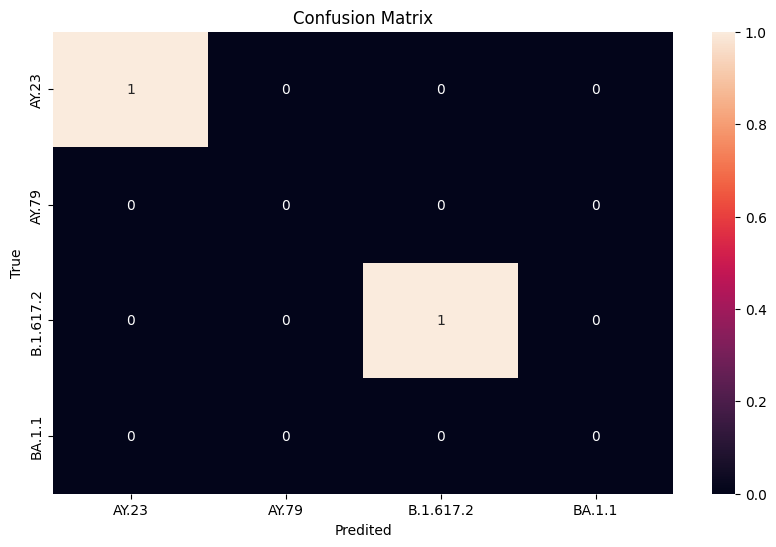

In [64]:
#Plot a confusion matrix

cm = confusion_matrix(Y_test, Y_pred, labels=model.classes_)

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)

plt.xlabel('Predited')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Save the plot 
#plt.savefig(r"C:\Users\confusion_matrix.png", bbox_inches='tight')

plt.show()

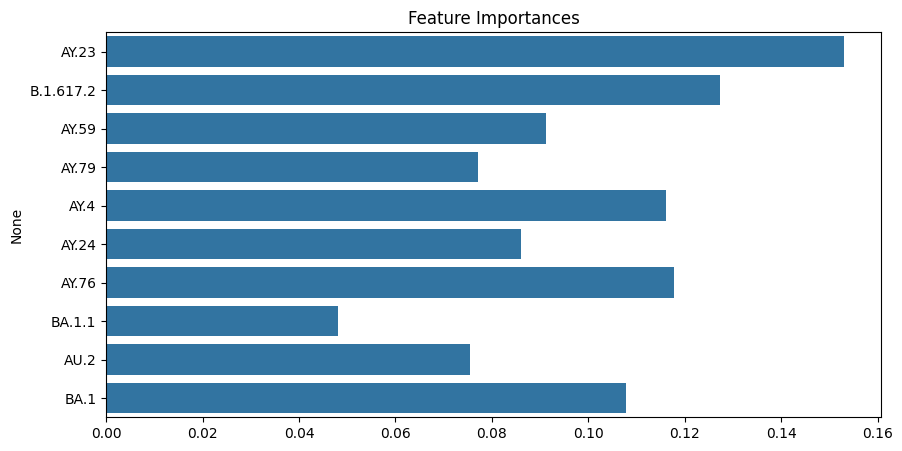

In [65]:
#identify the importance of the features in the ML model 

importances = model.feature_importances_
feature_names = X.columns

# Create a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances")

# Save the plot 
#plt.savefig(r"C:\Users\feature_importances.png", bbox_inches='tight')

plt.show()

In [66]:
#Using ross-validation to get a more reliable estimate
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, Y, cv=3)  # 3-fold cross-validation
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


C:\Users\dines\anaconda3\envs\ML01\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Cross-validation scores: [0.33333333 0.66666667 0.5       ]
Mean accuracy: 0.5
